<a href="https://colab.research.google.com/github/MyArist/DQLab/blob/master/Learn/Python/Fundamental/Fundamental%20Data%20Visualization%20with%20Python/Fundamental%20Data%20Visualization%20with%20Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# About This Course

Modul ini akan membahas beragam cara memvisualisasikan data, terutama cara memilih grafik yang tepat serta memodifikasinya agar fokus pada pesan yang ingin disampaikan. Modul ini juga akan menuntun kamu untuk memahami elemen-elemen pada grafik sehingga kamu dapat mengubah elemen-elemen tersebut sesuai kebutuhan. Modul ini tidak akan mengajarkan kamu menjadi seorang analis data dengan kemampuan desain grafis sekaligus. Namun, setidaknya kamu dapat memahami bagaimana sebuah desain visual dapat membantu audiens memahami data yang disajikan.

# Kenapa Perlu Visualisasi Data dan Bagaimana Caranya?

Pada bagian ini kamu akan mempelajari kenapa visualisasi data dibutuhkan dan bagaimana cara memvisualisasikan data.

## Pengantar

“Hasil kerjamu bikin dalam grafik saja agar mudah dicerna. Minta tolong Senja jelaskan kalau tidak tahu caranya,” komentar Andra di telepon. Sudah kuduga, akan ada revisi. Tipe pribadi seperti Andra tampaknya sulit dipuaskan.

Ponselku kembali bergetar. Andra kembali menelepon, “Sore ini juga kirim hasil visualisasinya ke saya.”

Kalau seperti ini, sesegera mungkin aku butuh kuliah singkat dengan Senja!

Lembar berisi grafik warna-warni tersaji di mejaku. Aku baru saja mendapat referensi penyajian data yang pernah dilakukan perusahaan tahun lalu. Menarik sekali! Grafiknya memiliki sejumlah bentuk dan paduan warna yang memanjakan mata. Namun, yang paling pentingnya lagi…warna dan bentuk tersebut mewakili makna data. Tidak sembarangan. Bagaimana yah bisa seperti ini? Mengingat selama ini aku hanya berkutat pada angka dan kode. Di tengah perenunganku, pundakku ditepuk dengan gulungan dokumen. Saat kulirik, Senja sudah berdiri rapi dengan setumpuk modul. Apakah ini ada hubungannya dengan berkas-berkas penyajian data yang kudapat tadi pagi?

“Sudah selesai lihat-lihatnya, Aksara?” Tuh kan benar! Pasti ada hubungannya. Tapi kalau yang dipelajari warna-warni grafik seperti ini sih,
boleh deh.
“Sudah. Apa yang akan aku pelajari lagi, Nja?”

“Tentunya hal yang bikin kamu bisa menyajikan data seperti yang dicontohkan berkas-berkas tadi. Tepatnya cara memvisualisasikan data. Soalnya, enggak selamanya orang-orang bisa membaca data mentah seperti kita, perlu disajikan lebih sederhana dan beragam.”
Aku mengangguk setuju. Aku siap untuk materi ini! 

“Oke, ini kamu baca dulu modulnya sembari saya persiapkan bahan praktiknya.”

## Visualisasi Data, Apa itu?

Seorang analis data seringkali menghabiskan waktunya untuk berkutat dengan data, menganalisisnya hingga benar-benar menghasilkan kesimpulan yang tepat. Pendek kata, yang diurusi melulu soal angka.

Namun, ada satu hal yang seringkali dilewatkan, yakni ketika harus menyajikannya kepada orang lain yang belum tentu paham dengan data tersebut. Hal yang paling umum terjadi adalah: data disajikan apa adanya. Misalnya, dalam bentuk grafik dengan desain template dari aplikasi seperti Microsoft Excel. Karena menggunakan template, tampilan data itu menjadi monoton, bikin bosan, kadang tidak pas dengan kesimpulan dan pesan yang ingin disampaikan.

Permasalahan lain pun muncul, yakni ketika orang yang melihatnya salah mengartikan data. Ini dapat terjadi karena, misalnya, data dipresentasikan tanpa narasi yang jelas. Atau, bisa jadi tata letak dan elemen grafisnya tidak tepat sehingga audiens tersesat dari maksud dan tujuan sang analis.

Maka dari itu, penting bagi seorang analis data untuk memvisualisasikan hasil kerjanya dengan baik. Analis data perlu mengetahui cara menggambarkan data agar audiens memahami konteks dari data yang disajikan.

## Apa yang kamu dapatkan?

Modul ini akan membahas beragam cara memvisualisasikan data, terutama cara memilih grafik yang tepat serta memodifikasinya agar fokus pada pesan yang ingin disampaikan. Setelah menuntaskan modul ini, diharapkan tidak lagi menggunakan jenis grafik yang itu-itu saja dengan desain yang itu lagi dan itu lagi.

Modul ini juga akan menuntun untuk memahami elemen-elemen pada grafik sehingga dapat mengubah elemen-elemen tersebut sesuai kebutuhan. Pada modul ini akan mempelajari bagian mana yang perlu dan tidak perlu ditampilkan dalam visualisasi data.

Modul ini tidak akan mengajarkan menjadi seorang analis data dengan kemampuan desain grafis sekaligus. Namun, setidaknya lebih mudah untuk dapat memahami bagaimana sebuah desain visual dapat membantu audiens memahami data yang disajikan.

## Mengenal visualisasi data

Visualisasi data dapat didefinisikan sebagai cara merepresentasikan data melalui komponen visual, seperti posisi, komposisi, panjang, luas, dan warna. Visualisasi data juga mencakup cara berkomunikasi secara efektif kepada audiens melalui bahasa gambar.

Coba perhatikan **Gambar 1**. Gambar tersebut dibuat oleh engineer asal Prancis, Charles Joseph Minard, yang terlibat dalam invasi militer Napoleon ke Rusia pada 1812-1813.

![Grafik kekuatan pasukan Napoleon dalam invasi ke Rusia pada 1812-1813](https://github.com/MyArist/DQLab/blob/master/Learn/Python/Fundamental/Fundamental%20Data%20Visualization%20with%20Python/Picts/vis1.png?raw=1)

**Gambar 1** Grafik kekuatan pasukan Napoleon dalam invasi ke Rusia pada 1812-1813

Garis coklat dan hitam memperlihatkan kekuatan pasukan dari Prancis menuju dan kembali dari Moskow. Lebar garis menggambarkan banyaknya serdadu. Lebarnya mengecil karena jumlahnya terus menyusut.

Gambar yang dibuat tahun 1869 tersebut juga memperlihatkan peta, rute dan arah perjalanan, jarak tempuh, hingga grafik temperatur pada medan yang dilalui.

Siapapun yang melihatnya, dan paham bahasanya, akan dengan mudah mengetahui data dan cerita yang disampaikan dalam gambar tersebut. Invasi itu berakhir dengan hilangnya sebagian besar kekuatan Napoleon. Awalnya lebih dari 400.000-an prajurit, yang kembali hanya 10.000-an. Sisanya menjadi korban akibat penyakit, suhu dingin, kelaparan, atau serangan lawan. Tragis!

## Urgensi visualisasi data

Dari contoh sebelumnya, jelaslah bahwa penyajian data dengan visualisasi yang tepat bisa dengan cepat mendapat perhatian audiens dan membuatnya paham tentang apa yang disampaikan.

Itulah tujuan utama visualisasi data. Bukan sekadar membuat tampilan data yang enak dilihat, tetapi juga harus bisa membuat data lebih mudah dipahami, jelas, dan menarik. Yang tidak kalah penting, harus dapat meyakinkan audiens sesuai kesimpulan dan narasi yang dibangun analis.

Pembahasan tentang visualisasi data ini dimaksudkan dengan tujuan sebagai berikut:

1. **Memecahkan masalah, bukan sekadar tampil cantik**. Ingatlah bahwa informasi visual lebih bukan mengutamakan hasil akhir berupa infografik atau presentasi serba indah. Sasarannya adalah memproses dan mengorganisasi fakta dan data, menemukan pola, hingga menghasilkan solusi. Desain visual membantu mengomunikasikan penyelesaian masalah itu agar mudah dipahami.
2. **Fokus pada target dan audiens, bukan tools ataupun tekniknya**. Modul ini tidak mewajibkan penggunaan aplikasi tertentu ataupun teknik khusus untuk memvisualkan data. Maka itu diperbolehkan menggunakan cara dan tools apa pun untuk itu. Yang diutamakan adalah apa tujuan menampilkan data tersebut dan siapakah audiensnya.
3. **Panduan dan alur, bukan asal menata gambar**. Urutan dan penempatan elemen visual harus dapat memandu audiens untuk memahami masalah hingga menuju jalan keluarnya. Memilih jenis dan ukuran huruf, warna yang tepat, mengatur tata letak visualnya, serta mengatur pola elemen visual menjadi penting agar audiens memahami maksud dan pesan yang dimunculkan dari data.
4. **Konsep dan kerangka berpikir, bukan cuma kreativitas visual**. Visualisasi data adalah mentransfer konsep dan cara berpikir atas data dan proses analisisnya dengan cara yang mudah dipahami oleh oleh manusia. Tujuannya adalah meyakinkan audiens dengan konsep dan kerangka pikir yang dibangun. Data dan analisisnya menjadi bukti penguat dan tak terbantahkan atas konsep tersebut.
5. **Kontekstual**. Data yang disajikan harus saling mendukung satu sama lain. Rangkaian visual yang dibuat harus memiliki konteks yang sama dan terorganisasi dengan baik sehingga menambah kejelasan makna dari pesan yang ingin disampaikan.

## Eksploratif versus naratif

Sebelum menentukan visual yang cocok atas suatu data, seorang analis data harus memahami siapa atau audiens yang akan membaca data tersebut. Dengan mengetahui karakter audiens, seorang data analis akan bisa memperkirakan kepadatan data dan informasi yang akan disajikan.

Hal itu akan memengaruhi pilihan visualisasi data, yakni visual yang mengeksplorasi data sedetail mungkin atau grafis yang menarasikan informasi dengan ringkas dan jelas. Apa bedanya?

**Visual naratif** seringkali digunakan untuk presentasi, biasanya statis, dan berisi ringkasan informasi. Tujuan utamanya adalah menjelaskan hasil akhir atau kesimpulan dari analis.

Hasil tersebut bisa jadi disebarluaskan untuk banyak orang dengan berbagai tingkat pemahaman terhadap data. Audiens tidak perlu lama-lama membacanya dan semestinya bisa segera memahaminya. Oleh karena itu, penyajiannya cenderung menonjolkan keindahan visual. Maka tidak heran bila informasi tidak disampaikan secara detail, misalnya grafik tanpa legenda, label data, ataupun detail lain.

Contoh visual naratif dapat dilihat pada **Gambar 2**.

![](https://github.com/MyArist/DQLab/blob/master/Learn/Python/Fundamental/Fundamental%20Data%20Visualization%20with%20Python/Picts/heatmap.png?raw=1)

**Gambar 2**: Heatmap menggambarkan transaksi kumulatif harian selama satu tahun. Grafik ini tidak menampilkan data secara detail karena tujuan utamanya adalah memperlihatkan pada jam berapa transaksi tertinggi dan terendah terjadi.

Sebaliknya, visual eksploratif bertujuan memaparkan proses yang dilakukan untuk mendapatkan hasil akhir yang tepat. Penyajiannya dibuat serinci dan seakurat mungkin untuk meyakinkan bahwa prosesnya benar.

**Visual eksploratif** cenderung menampilkan banyak data. Audiensnya pun tidak sembarang orang karena butuh waktu lebih lama untuk mencerna kompleksitas data tersebut. Visual ini lebih ditujukan untuk orang-orang yang memang memahami data atau bisa menginvestigasi data tersebut. Contoh visual eksploratif dapat dilihat pada **Gambar 3**.

![](https://github.com/MyArist/DQLab/blob/master/Learn/Python/Fundamental/Fundamental%20Data%20Visualization%20with%20Python/Picts/eksp.png?raw=1)

**Gambar 3**: Grafik transaksi harian selama satu tahun. Grafik menggunakan elemen secara detail untuk memperlihatkan performa per jam setiap hari.

Baik visual naratif maupun eksploratif ini memiliki tantangan tersendiri dalam pengerjaannya. Untuk grafis naratif, sudah jelas bahwa kekuatan penyajiannya terletak pada **cerita dan pesan** dari narasi yang disampaikan. Cerita dan pesan itu akan mudah dipahami apabila didukung dengan paparan yang tidak bertele-tele dan kemasan visual "menuntun" audiens pada tujuan yang sama. Wujudnya bisa berupa infografik, *annual report*, materi promosi, hingga *company profile*.

Adapun visual eksploratif haruslah menonjolkan kekuatan analisis, hubungan sebab-akibat perubahan data, dan proses lain. Detail data ditampilkan untuk mendukung kesahihan analisis.

## Quiz

Dalam memaparkan data untuk rapat manajer tingkat menengah di perusahaan, terdapat sejumlah data yang harus ditampilkan kepada para manajer tersebut.

Tampilan grafik manakah yang paling tepat disajikan berikut ini?

### Visualisasi 1

![](https://github.com/MyArist/DQLab/blob/master/Learn/Python/Fundamental/Fundamental%20Data%20Visualization%20with%20Python/Picts/Visual1.png?raw=1)

### Visualisasi 2

![](https://github.com/MyArist/DQLab/blob/master/Learn/Python/Fundamental/Fundamental%20Data%20Visualization%20with%20Python/Picts/Visual2.png?raw=1)

### Visualisasi 3

![](https://github.com/MyArist/DQLab/blob/master/Learn/Python/Fundamental/Fundamental%20Data%20Visualization%20with%20Python/Picts/Visual3.png?raw=1)

## Penjelasan pemilihan grafik pada Quiz

Jawaban Visual 2 adalah **benar**. Berikut penjelasannya: 

Saat presentasi kepada manajer, data yang perlu dipaparkan adalah ringkasan atau kesimpulan dari sekumpulan data. Penyebutan simpulan analisis data sangat perlu untuk menggiring manajer pada analisis tentang strategi/langkah lanjutan.

Visual 1 akan menyulitkan audiens untuk mencari rata-rata ataupun puncak data. Bisa menyajikan gambar ini ketika berdiskusi dengan para analis data. Analis akan mengeksplorasi data tersebut dengan analisis-analisis lanjutan yang lebih dalam.

Adapun Visual 3 lebih cocok disajikan kepada audiens umum, misalnya untuk infografik atau materi presentasi kepada klien. Bisa juga disampaikan untuk level direksi ke atas, dengan catatan penyaji siap dengan data yang lebih detail.

## Memetakan tujuan

Aku baru selesai membaca pengantar awal isi modul mengenai visualisasi data. Lalu kutemukan hasil survei yang menarik untuk kujadikan bahan praktik awal. Aku pun mencoba menyampaikan keinginanku pada Senja. (lihat **Gambar 4**).

![](https://github.com/MyArist/DQLab/blob/master/Learn/Python/Fundamental/Fundamental%20Data%20Visualization%20with%20Python/Picts/persp.png?raw=1)

**Gambar 4** Grafik batang ganda menunjukkan nilai hasil survei terhadap orangtua dan siswa.

“Nja, ini aku mau coba praktik pakai data antusiasme orangtua dan murid terhadap kegiatan sekolah,” ujarku setelah membaca modul visualisasi data dari Senja.

“Boleh. Itu praktiknya ada di berkas studi kasus ya, bisa kamu cek.”

“Iya, ini ditulis kalau sekolah A berharap bahwa murid-murid menunjukkan antusiasme lebih besar dibanding orangtua untuk semua kegiatan yang diadakan di sekolah. Dari grafik ini, awalnya pihak sekolah  tidak menyadari bahwa ternyata respons murid terhadap kegiatan religi tidak setinggi harapan orangtua. Itu karena grafik yang dimiliki sekolah tidak memperlihatkan perbedaan yang jelas satu sama lain.”

“Oke, sudah ada kasusnya. Sudah paham harus diolah seperti apa visualisasinya, Aksara?”

Aku terdiam untuk berpikir sebentar.

“Aku akan mengubah desain grafiknya. Aku akan membuat slope graph (lihat **Gambar 5**) untuk memperlihatkan pertanyaan/kategori apa yang memperlihatkan respons murid lebih rendah ketimbang orangtua untuk menunjukkan secara jelas perbedaannya,” jawabku.

“Kenapa memilih grafik itu, Aksara? Bisa jelaskan alasannya?”

“Aku menggunakan slope graph agar keterangan kegiatan dapat diletakkan di samping (kiri) dari angka-angka tersebut. Jika aku paksa menggunakan column chart, aku bisa menyusun urutan angkanya secara vertikal. Tetapi, di sekolah juga akan mengalami kesulitan yang sama seperti grafik sebelumnya. Grafik batang maupun kolom seharusnya menempatkan angka nol pada garis dasar, baik vertikal maupun horizontal. Ini bisa menjadi masalah karena perbedaan persentase respons pada antarkegiatan tidak terlalu besar, hanya sekian persen. Sekolah pun akan sulit melihat bedanya secara sekilas. Dengan slope graph, aku dapat menghilangkan garis zero based dan fokus pada kisaran angka persentase dalam data,” jelasku panjang lebar.

Senja tersenyum dan mempersilakanku untuk mulai mengerjakan studi kasusku dengan hasil seperti ini:

![](https://github.com/MyArist/DQLab/blob/master/Learn/Python/Fundamental/Fundamental%20Data%20Visualization%20with%20Python/Picts/slope.png?raw=1)

**Gambar 5**: Slope graph merupakan salah satu cara membandingkan dua kategori/kelompok dengan berbagai variabel.

“Gimana menurutmu hasilnya, Nja?” ujarku sambil menunjukkan hasil visualisasiku.

“Hmmm, menurut saya, kamu bisa menampilkan angka persentase dari murid dan orangtua dari item kegiatan religi saja. Yang lain bisa kamu jelaskan tanpa harus menampilkan grafiknya. Contohnya seperti ini agar menjadi lebih simpel (lihat **Gambar 6**)."

Aku membiarkan Senja mengambil alih hasil kerjaku sebentar. Setelah diubah sedikit oleh Senja, aku mendapati gambar jadi lebih simpel dan langsung memperlihatkan pesan yang ingin disampaikan.

![](https://github.com/MyArist/DQLab/blob/master/Learn/Python/Fundamental/Fundamental%20Data%20Visualization%20with%20Python/Picts/circle.png?raw=1)

**Gambar 6**: Dengan mengandalkan kekuatan teks dan warna, pesan dalam grafik dapat terlihat dengan jelas meskipun desainnya sederhana.

“Sekarang kamu punya dua opsi grafik, Aksara, terutama dalam hal menampilkan seberapa detail data yang ingin ditonjolkan. Grafik yang terakhir menonjolkan peringatan tentang kegiatan yang perlu dibenahi, sementara grafik sebelumnya menitikberatkan pada seberapa antusias orangtua dan siswa terhadap seluruh kegiatan di sekolah. Jadi lebih beragam untuk disajikan semisal kita punya klien,” terang Senja.

Dari penjelasan Senja, hal yang perlu kucatat adalah beri opsi tampilan grafik, jangan hanya satu.

“Makasih sarannya, Nja!”

# Jenis Grafik dan Penggunaannya

Pada bagian ini kamu akan mempelajari jenis-jenis grafik apa saja yang cocok digunakan dalam memvisualisasikan data.

## Proses visualisasi data

“Nja, aku mau tanya deh.”

“Ya? Tanya saja,” sahut Senja sambil tetap fokus pada layar laptop.

“Sebelum menarasikan data, sebenarnya apa yang harus kita perhatikan ya?”

Senja menghentikan pekerjaannya untuk menjawab rasa penasaranku.

“Pertama, **apa**. Tanyakan pada dirimu, pesan/hal apa yang paling ingin kamu sampaikan kepada audiens. Misalnya, kamu ingin audiens tahu bahwa performa perusahaan terus menurun. Atau, kinerja perusahaan sedang bagus, tetapi sebetulnya masih perlu ada perbaikan di beberapa sektor. Jika pesan utama sudah diketahui, periksalah apakah data dan grafik yang kamu miliki sudah menunjukkan dengan jelas pesan tersebut,” jelas Senja.

Aku diam mendengarkan sembari sibuk mencatat poin-poin pentingnya.

“Kedua, **untuk apa** orang lain perlu mengetahui hal yang kamu sampaikan tadi. Di sinilah kamu tunjukkan hasil analisismu terhadap data yang kamu miliki. Hasil analisismu harus bisa membuktikan bahwa pesan yang kamu sampaikan tadi penting karena ada efek lanjutan yang tak kalah penting dari pesan tersebut. Dari contoh tadi, misalnya, kamu ingin audiens tahu bahwa performa perusahaan akan semakin anjlok jika tidak segera mengambil tindakan tepat. Atau, untuk contoh kedua, perusahaan sebetulnya bisa mendapatkan hasil lebih maksimal jika sektor-sektor tertentu segera mengevaluasi kinerjanya yang merosot,” tambah Senja.

Tak kusangka cukup banyak juga hal yang tak boleh kulewatkan saat mengolah dan menarasikan data.

“Terakhir,  **bagaimana** caranya agar masalah yang kamu sampaikan tadi bisa teratasi. Di sini kamu bisa menyampaikan sejumlah alternatif solusi atau action plan yang diperlukan, tentunya berdasarkan analisis data yang menunjukkan bahwa rencana itulah yang paling baik untuk ditindaklanjuti. Jadi, sudah cukup jelas ya, Aksara?”

“Iya, Nja. Makasih ya! Ini jelas banget.”

“Satu lagi, Aksara. Itu baru langkah awal. Dengan cara itu, setidaknya kamu bisa lebih fokus pada pesan yang ingin kamu sampaikan kepada audiens. Kamu juga bisa lebih fokus menentukan data apa saja yang perlu disajikan. Ini penting karena pada langkah berikutnya, kamu bisa melanjutkan analisis data dan menyampaikan kesimpulan yang benar-benar berkaitan dengan masalah yang kamu paparkan.”

“Kelihatannya sih mudah, tapi sebenarnya penuh tantangan yah, Nja?”

“Begini saja. Kalau kamu kesulitan melakukannya, buatlah sketsa atau coretan-coretan seperlunya tentang tiga hal tadi. Saya bisa berikan contohnya (lihat **Gambar 7**).”

Aku pun mempelajari gambar yang dibagikan Senja.

![](https://github.com/MyArist/DQLab/blob/master/Learn/Python/Fundamental/Fundamental%20Data%20Visualization%20with%20Python/Picts/vis2.png?raw=1)

## Jenis visualisasi data

“Aksara, kalau Jika sketsa tadi sudah selesai dibuat, jangan lupa menguji kembali apakah data dan grafik yang ditampilkan sudah sesuai dengan pertanyaan-pertanyaan tadi ya,” pinta Senja.

“Maksudnya, Nja?”

“Begini, kamu tentu tahu bahwa data bisa ditampilkan dalam berbagai jenis tampilan. Masing-masing jenis memiliki karakter visual dan fungsi berbeda-beda. Nah, periksalah sketsa grafik yang kamu buat pada langkah sebelumnya, apakah jenisnya cocok dengan pesan yang ingin kamu sampaikan.”

“Tapi, bukankah ada beberapa grafik saja yang lazim digunakan dan mudah dipahami orang awam? Setahuku hanya tabel, grafik batang/kolom, dan pie chart atau kombinasi dari itu semua,” sahutku masih bingung.

“Betul, itu jenis-jenis visualisasi data yang biasa disajikan karena mudah dibuat dan mudah dipahami. Secara umum visualisasi data itu bisa diwujudkan dengan cara teks, grafik, tabel, dan peta. Dan apa yang kamu sebutkan tadi adalah bagian dari jenis-jenis visualisasi data di atas. Masih banyak jenis lainnya yang bisa kamu eksplorasi. Dari situ, kamu bisa merangkainya menjadi sebuah tata visual yang kompleks, misalnya infografik, dashboard, dan sebagainya.”

“Oh oke, aku mulai paham.”

“Sebenarnya enggak cuma itu saja, kamu juga harus belajar tentang memilih warna, mengatur ukuran huruf, serta tata letak ataupun bentuk-bentuk visual untuk membuat visualisasi data menjadi sempurna,” tambah Senja.

**Lama akhirnya aku menyadari jika visualisasi data bukan hanya soal angka, tetapi juga memanjakan mata.**

## Pilah-pilih grafik

Membaca grafik bukanlah satu pekerjaan mudah bagi sebagian orang, terutama yang tidak terbiasa melihat data. Melihat dua garis saling bersinggungan, misalnya, bisa menimbulkan arti berbeda bagi orang yang tidak memahami data.

Oleh karena itu, penting sekali memperkenalkan visualisasi data dengan sesederhana mungkin agar alur membaca dan mengambil kesimpulan atas elemen visual yang ditampilkan dengan lebih mudah.

Ada berbagai macam cara menampilkan data, entah dalam bentuk grafik, angka, atau teks. Cara menampilkannya tergantung pada pesan yang ingin Anda sampaikan kepada audiens. Berikut penjelasan singkat tentang sejumlah pilihan visualisasi data.

Jenis Grafik | Bentuk | Keterangan
:---: | :---: | :---
Teks dan angka | ![](https://github.com/MyArist/DQLab/blob/master/Learn/Python/Fundamental/Fundamental%20Data%20Visualization%20with%20Python/Picts/teks.png?raw=1) | Data tidak harus ditampilkan dalam bentuk grafik. Anda dapat menggunakan teks dan angka saja, dengan catatan hanya 1-2 data yang ingin ditampilkan. Beri penebalan atau warna berbeda pada angka atau teks yang ingin ditonjolkan agar perhatian pembaca terarah pada bagian tersebut.
Diagram garis |	![](https://github.com/MyArist/DQLab/blob/master/Learn/Python/Fundamental/Fundamental%20Data%20Visualization%20with%20Python/Picts/garis.png?raw=1) | Line chart paling tepat digunakan untuk menunjukkan tren dari waktu ke waktu. Sumbu X biasanya mewakili periode waktu, sumbu Y menggambarkan nilai/kuantitas. Contohnya jumlah penjualan dari pekan ke pekan selama satu tahun. Grafik ini dapat memuat banyak titik data yang dapat diatur saling berdekatan sesuai kerapatan periode waktu. Karena visualnya yang simpel, Anda bisa menggunakan banyak garis sekaligus dalam satu tampilan. Ini memudahkan penggambaran data tren dari beragam kategori.
Diagram area | ![](https://github.com/MyArist/DQLab/blob/master/Learn/Python/Fundamental/Fundamental%20Data%20Visualization%20with%20Python/Picts/area.png?raw=1) | Diagram ini merupakan pengembangan dari diagram garis. Diagram area kerap digunakan untuk menggambarkan nilai total dalam angka maupun persentase dari waktu ke waktu. Pemilihan warna dan volume area menjadi penting untuk menitikberatkan bagian mana yang ingin ditonjolkan. Yang perlu diperhatikan saat menggunakan diagram ini adalah, jangan sampai ada area yang menutupi area lain.
Diagram batang | ![](https://github.com/MyArist/DQLab/blob/master/Learn/Python/Fundamental/Fundamental%20Data%20Visualization%20with%20Python/Picts/batang.png?raw=1) | Disebut juga dengan bar chart, paling cocok untuk komparasi data dengan banyak kategori atau rangkaian data (data series). Keterangan panjang pada kategori sangat dimungkinkan dan diletakkan pada sumbu Y. Lebar batang dalam horizontal bar ditentukan dari nilai data pada sumbu X. Tinggi batang sekitar dua kali celah antarbatang. Untuk jenis data kategori, jarak antarbatang tidak boleh terlalu rapat karena setiap batang merupakan kategori yang berdiri sendiri, bukan suatu rangkaian data yang saling terkait. Contohnya grafik penjualan berdasarkan produk. Untuk kemudahan membaca data, Anda dapat mengurutkan kategori berdasarkan besar nilainya, misal dari nilai tertinggi hingga terendah. Lain halnya dengan data series, di mana data didistribusikan berdasarkan kategori berjenjang, misalnya populasi penduduk berdasarkan rentang usia atau tingkat pendidikan. Urutan kategori tidak boleh diubah, harus sesuai dengan jenjangnya. Celah antarbatang dapat dipersempit hingga hampir menempel. Grafik untuk data series seperti ini sering disebut dengan histogram.
Grafik kolom | ![](https://github.com/MyArist/DQLab/blob/master/Learn/Python/Fundamental/Fundamental%20Data%20Visualization%20with%20Python/Picts/kolom.gif?raw=1) | Column chart atau vertical chart bisa digunakan untuk melihat perbandingan sejumlah kategori dan atau perubahannya dalam periode waktu tertentu (tren). Saat digunakan untuk menampilkan tren, fungsinya sama dengan grafik garis (line chart). Perubahan waktu ini tecermin pada sumbu X. Jangan gunakan sumbu Y untuk keterangan waktu. Cara membacanya dari kiri ke kanan, jadi semakin ke kanan, waktunya semakin baru atau menuju ujung waktu (urut waktu). Gunakan satu warna untuk semua kolom. Saat digunakan untuk menampilkan beberapa kategori, gunakan warna berbeda untuk setiap kategori. Alternatif lain, menggunakan warna yang sama, tetapi kepekatannya bervariasi tergantung nilai masing-masing kategori, semakin pekat semakin menonjol. Ingat bahwa grafik batang vertikal punya keterbatasan dalam menggambarkan komparasi kategori. Grafik ini akan sulit dibaca jika memuat terlalu banyak kategori. Susah pula dibaca bila keterangan kategori pada sumbu X terlalu panjang karena teks akan tampil secara vertikal. Sama seperti bar chart, Anda dapat mengurutkan penempatan kategori pada grafik kolom berdasarkan urutan nilainya, misalnya dari tertinggi hingga terendah atau sebaliknya. Catatan penting, selalu gunakan zero baseline atau titik nol pada sumbu Y.
Histogram | ![](https://github.com/MyArist/DQLab/blob/master/Learn/Python/Fundamental/Fundamental%20Data%20Visualization%20with%20Python/Picts/histogram.gif?raw=1) | Sekilas grafik ini mirip dengan bar/column chart. Namun, sebetulnya ada perbedaan mendasar antara histogram dan grafik batang. Pada grafik batang, baik horizontal maupun vertikal, lebar pilar diatur agar tidak terlalu besar. Jarak antarbatang juga diberi celah lebih longgar. Ini dilakukan karena antara satu kolom/batang dengan yang lain menggambarkan kategori yang benar-benar berbeda, tidak terkait satu sama lain, misalnya jenis produk. Urutan kategori boleh diubah berdasarkan urutan besaran nilai masing-masing kategori. Anda boleh menggunakan lebih dari satu warna untuk membedakan tiap kategori. Adapun pada histogram, jarak antarkolom/batang dibuat serapat mungkin, bahkan menempel. Dari segi visual, jarak sempit ini akan membawa mata pembaca untuk menghubungkan kelompok-kelompok data dan mengurutkannya berdasarkan kriteria tertentu, misalnya jenjang pendidikan dan rentang usia. Urutan kelompok data ini tidak boleh diacak, tetapi harus sesuai dengan jenjangnya. Warna batangnya dibuat seragam.
Grafik lingkaran | ![](https://github.com/MyArist/DQLab/blob/master/Learn/Python/Fundamental/Fundamental%20Data%20Visualization%20with%20Python/Picts/lingkaran.png?raw=1) | Nama lainnya adalah pie chart, digunakan untuk menggambarkan komposisi antarbagian pada suatu kesatuan utuh. Bagian ini biasanya direpresentasikan dalam satuan persen sehingga jika seluruh bagian dijumlahkan, hasilnya sama dengan seratus persen. Jenis grafik ini akan mudah dipahami jika kategori yang ditampilkan tidak banyak, misal 5 bagian. Semakin banyak bagiannya, apalagi jika proposinya sangat kecil, akan kian sulit membacanya. Tidak ada cara baku dalam membaca datanya, tetapi biasanya seseorang akan membaca bagian paling besar karena paling mudah dibaca.
Grafik donat | ![](https://github.com/MyArist/DQLab/blob/master/Learn/Python/Fundamental/Fundamental%20Data%20Visualization%20with%20Python/Picts/donat.png?raw=1) | Grafik ini merupakan bentuk lain dari pie chart, fungsinya juga merepresentasikan proporsi atau komposisi antarbagian. Jumlah total bagian pun seratus persen. Karena tampilannya lebih sederhana, grafik ini juga kerap dimodifikasi menjadi setengah lingkaran. Uniknya, meski dibentuk separuh lingkaran, jumlah seluruh bagiannya tetap seratus persen. Modifikasi lainnya adalah dengan membentuknya seperti grafik batang melingkar dan berlapis-lapis (sunburst) untuk menggambarkan detail data pada satu kategori. Sama seperti pie chart, batasi banyaknya kategori dalam grafik ini. Jika selisih nilai kategori terlalu kecil, munculkan label datanya.
Scatter plot | ![](https://github.com/MyArist/DQLab/blob/master/Learn/Python/Fundamental/Fundamental%20Data%20Visualization%20with%20Python/Picts/scatter.gif?raw=1) | Grafik ini digunakan untuk menggambarkan hubungan antara dua variabel. Masing-masing data diplot menjadi sebuah titik yang diposisikan sesuai nilai pada sumbu XY. Sumbu X mewakili nilai abstrak yang tidak tergantung variabel lain, sehingga disebut variabel independen. Adapun nilai Y merupakan variabel dependen dan ditempatkan pada sumbu vertikal. Yang perlu menjadi perhatian adalah, karena wujudnya berupa titik-titik tersebar, bantulah audiens dengan garis rata-rata atau penanda khusus yang menjadi standar data, misalnya target penjualan atau batas nilai minimal. Jenis grafik ini dapat dimodifikasi menjadi bubble chart, sehingga data yang digunakan dapat dikombinasikan dengan variabel ketiga dan nilainya digunakan untuk menentukan besar balon data.
Peta | ![](https://github.com/MyArist/DQLab/blob/master/Learn/Python/Fundamental/Fundamental%20Data%20Visualization%20with%20Python/Picts/peta.png?raw=1) | Data pada peta terdiri dari dua unsur, yakni data spasial dan nilai untuk spasial tersebut. Data spasial berisi koordinat, minimal terdiri dari dua koordinat dua dimensi (x dan y). Satu koordinat lagi (z) dapat ditambahkan untuk gambar tiga dimensi. Data spasial dapat terdiri dari satu titik (point) atau banyak titik yang saling terhubung menjadi garis tertutup (poligon/area) atau terbuka (polyline). Contoh data spasial berbentuk titik adalah lokasi kantor cabang atau pasar. Contoh garis terbuka antara lain batas administrasi, jalan, rute, dan jaringan pipa gas. Adapun contoh poligon antara lain wilayah provinsi, kota, atau area khusus. Jarak dan skala pada peta tidak melulu harus mengikuti koordinat bumi. Anda dapat menyederhanakannya dalam bentuk lain agar mudah dipahami.
Grafik radar | ![](https://github.com/MyArist/DQLab/blob/master/Learn/Python/Fundamental/Fundamental%20Data%20Visualization%20with%20Python/Picts/radar.png?raw=1) | Grafik ini menampilkan data multivariabel yang digambarkan dalam koordinat polar pada sumbu berbeda-beda dengan satuan/unit yang sama. Panjang jari-jari menggambarkan nilai setiap variabel. Jumlah variabel ideal adalah 6-8 variabel. Setiap variabel memiliki satu sumbu yang dipisahkan dalam sudut yang sama dengan sumbu yang lain sehingga grafik tampak simetris. Grafik radar bisa dipakai untuk membandingkan beberapa kategori. Hindari terlalu banyak kategori karena akan membuat garis/area dalam grafik bertumpuk berlapis-lapis.

## Quiz

Di antara grafik-grafik ini, manakah yang paling cocok digunakan untuk menggambarkan jumlah karyawan berdasarkan usia?

### Pie chart	

![](https://github.com/MyArist/DQLab/blob/master/Learn/Python/Fundamental/Fundamental%20Data%20Visualization%20with%20Python/Picts/pie.png?raw=1)

### Column chart	

![](https://github.com/MyArist/DQLab/blob/master/Learn/Python/Fundamental/Fundamental%20Data%20Visualization%20with%20Python/Picts/column.png?raw=1)

### Histogram	

![](https://github.com/MyArist/DQLab/blob/master/Learn/Python/Fundamental/Fundamental%20Data%20Visualization%20with%20Python/Picts/hist.png?raw=1)

## Penjelasan pemilihan grafik pada Quiz

Jika memilih Histogram jawabannya adalah **benar**. Kenapa harusnya Histogram, berikut penjelasannya: 

Ingat, kelompok usia adalah kategori data berantai yang saling berhubungan. Secara psikis, pembaca data akan dapat menghubungkan masing-masing kelompok usia itu berdasarkan urutannya, misal dari usia paling muda (kecil) hingga paling besar. Urutan ini tidak boleh diubah berdasarkan besaran nilai data pada setiap kategori.

Penggunaan pie chart dapat dimaklumi bila pesan yang ingin disampaikan adalah proporsi jumlah karyawan berdasarkan usia. Namun, tampilan pie chart di atas menyulitkan pembaca untuk menelusuri bagian lingkaran dan keterangan kategori usia pada legenda.

Demikian juga dengan diagram kolom, Penggunaan banyak warna tidak mutlak digunakan, apalagi setiap kelompok tersebut homogen, yakni dipilah berdasarkan rentang usia.

Histogram horizontal memperlihatkan postur jumlah karyawan berdasarkan usia. Dari tabel ini terlihat kelompok usia manakah yang paling dominan.

## Panduan ringkas memilih grafik

Merangkum jenis-jenis grafik dan penggunaannya, berikut ini panduan singkat penggunaan jenis grafik berdasarkan kebutuhannya.

|Tujuan | Jenis Grafik yang Cocok |||||||
|:--- | :---: | :---: | :---: | :---: | :---: | :---: | :---: |
| Hanya menonjolkan satu nilai variabel | ![](https://github.com/MyArist/DQLab/blob/master/Learn/Python/Fundamental/Fundamental%20Data%20Visualization%20with%20Python/Picts/1.png?raw=1) | ![](https://github.com/MyArist/DQLab/blob/master/Learn/Python/Fundamental/Fundamental%20Data%20Visualization%20with%20Python/Picts/2.gif?raw=1) | ![](https://github.com/MyArist/DQLab/blob/master/Learn/Python/Fundamental/Fundamental%20Data%20Visualization%20with%20Python/Picts/3.gif?raw=1) | ![](https://github.com/MyArist/DQLab/blob/master/Learn/Python/Fundamental/Fundamental%20Data%20Visualization%20with%20Python/Picts/4.gif?raw=1) | | | |
| Menunjukkan peringkat/ranking | ![](https://github.com/MyArist/DQLab/blob/master/Learn/Python/Fundamental/Fundamental%20Data%20Visualization%20with%20Python/Picts/5.gif?raw=1) | ![](https://github.com/MyArist/DQLab/blob/master/Learn/Python/Fundamental/Fundamental%20Data%20Visualization%20with%20Python/Picts/6.png?raw=1) | ![](https://github.com/MyArist/DQLab/blob/master/Learn/Python/Fundamental/Fundamental%20Data%20Visualization%20with%20Python/Picts/7.gif?raw=1) | ![](https://github.com/MyArist/DQLab/blob/master/Learn/Python/Fundamental/Fundamental%20Data%20Visualization%20with%20Python/Picts/8.gif?raw=1) | ![](https://github.com/MyArist/DQLab/blob/master/Learn/Python/Fundamental/Fundamental%20Data%20Visualization%20with%20Python/Picts/9.gif?raw=1) | | |
| Menunjukkan dua variabel atau lebih | ![](https://github.com/MyArist/DQLab/blob/master/Learn/Python/Fundamental/Fundamental%20Data%20Visualization%20with%20Python/Picts/31.gif?raw=1) | ![](https://github.com/MyArist/DQLab/blob/master/Learn/Python/Fundamental/Fundamental%20Data%20Visualization%20with%20Python/Picts/32.gif?raw=1) | ![](https://github.com/MyArist/DQLab/blob/master/Learn/Python/Fundamental/Fundamental%20Data%20Visualization%20with%20Python/Picts/33.gif?raw=1) | ![](https://github.com/MyArist/DQLab/blob/master/Learn/Python/Fundamental/Fundamental%20Data%20Visualization%20with%20Python/Picts/34.gif?raw=1) | ![](https://github.com/MyArist/DQLab/blob/master/Learn/Python/Fundamental/Fundamental%20Data%20Visualization%20with%20Python/Picts/35.gif?raw=1) | ![](https://github.com/MyArist/DQLab/blob/master/Learn/Python/Fundamental/Fundamental%20Data%20Visualization%20with%20Python/Picts/36.gif?raw=1) | |
| Membandingkan dengan nilai tertentu (benchmark) | ![](https://github.com/MyArist/DQLab/blob/master/Learn/Python/Fundamental/Fundamental%20Data%20Visualization%20with%20Python/Picts/41.gif?raw=1) | ![](https://github.com/MyArist/DQLab/blob/master/Learn/Python/Fundamental/Fundamental%20Data%20Visualization%20with%20Python/Picts/42.gif?raw=1) | ![](https://github.com/MyArist/DQLab/blob/master/Learn/Python/Fundamental/Fundamental%20Data%20Visualization%20with%20Python/Picts/43.png?raw=1) | | | | |
| Perbandingan (komparasi) antarkategori | ![](https://github.com/MyArist/DQLab/blob/master/Learn/Python/Fundamental/Fundamental%20Data%20Visualization%20with%20Python/Picts/51.gif?raw=1) | ![](https://github.com/MyArist/DQLab/blob/master/Learn/Python/Fundamental/Fundamental%20Data%20Visualization%20with%20Python/Picts/52.png?raw=1) | ![](https://github.com/MyArist/DQLab/blob/master/Learn/Python/Fundamental/Fundamental%20Data%20Visualization%20with%20Python/Picts/53.png?raw=1) | ![](https://github.com/MyArist/DQLab/blob/master/Learn/Python/Fundamental/Fundamental%20Data%20Visualization%20with%20Python/Picts/54.gif?raw=1) | ![](https://github.com/MyArist/DQLab/blob/master/Learn/Python/Fundamental/Fundamental%20Data%20Visualization%20with%20Python/Picts/55.png?raw=1) | | |
| Menampilkan hasil survei | ![](https://github.com/MyArist/DQLab/blob/master/Learn/Python/Fundamental/Fundamental%20Data%20Visualization%20with%20Python/Picts/61.gif?raw=1) | ![](https://github.com/MyArist/DQLab/blob/master/Learn/Python/Fundamental/Fundamental%20Data%20Visualization%20with%20Python/Picts/62.gif?raw=1) | ![](https://github.com/MyArist/DQLab/blob/master/Learn/Python/Fundamental/Fundamental%20Data%20Visualization%20with%20Python/Picts/63.gif?raw=1) | ![](https://github.com/MyArist/DQLab/blob/master/Learn/Python/Fundamental/Fundamental%20Data%20Visualization%20with%20Python/Picts/64.gif?raw=1) | ![](https://github.com/MyArist/DQLab/blob/master/Learn/Python/Fundamental/Fundamental%20Data%20Visualization%20with%20Python/Picts/65.gif?raw=1) | ![](https://github.com/MyArist/DQLab/blob/master/Learn/Python/Fundamental/Fundamental%20Data%20Visualization%20with%20Python/Picts/66.png?raw=1) | ![](https://github.com/MyArist/DQLab/blob/master/Learn/Python/Fundamental/Fundamental%20Data%20Visualization%20with%20Python/Picts/67.gif?raw=1) |
| Menunjukkan proporsi bagian dari jumlah total | ![](https://github.com/MyArist/DQLab/blob/master/Learn/Python/Fundamental/Fundamental%20Data%20Visualization%20with%20Python/Picts/71.gif?raw=1) | ![](https://github.com/MyArist/DQLab/blob/master/Learn/Python/Fundamental/Fundamental%20Data%20Visualization%20with%20Python/Picts/72.gif?raw=1) | ![](https://github.com/MyArist/DQLab/blob/master/Learn/Python/Fundamental/Fundamental%20Data%20Visualization%20with%20Python/Picts/73.gif?raw=1) | ![](https://github.com/MyArist/DQLab/blob/master/Learn/Python/Fundamental/Fundamental%20Data%20Visualization%20with%20Python/Picts/74.gif?raw=1) | ![](https://github.com/MyArist/DQLab/blob/master/Learn/Python/Fundamental/Fundamental%20Data%20Visualization%20with%20Python/Picts/75.png?raw=1) | ![](https://github.com/MyArist/DQLab/blob/master/Learn/Python/Fundamental/Fundamental%20Data%20Visualization%20with%20Python/Picts/77.gif?raw=1) | |
| Menunjukkan perubahan nilai pada satu variabel | ![](https://github.com/MyArist/DQLab/blob/master/Learn/Python/Fundamental/Fundamental%20Data%20Visualization%20with%20Python/Picts/81.png?raw=1) | ![](https://github.com/MyArist/DQLab/blob/master/Learn/Python/Fundamental/Fundamental%20Data%20Visualization%20with%20Python/Picts/82.png?raw=1) | | | | | |
| Menampilkan simpangan (deviasi) data | ![](https://github.com/MyArist/DQLab/blob/master/Learn/Python/Fundamental/Fundamental%20Data%20Visualization%20with%20Python/Picts/91.gif?raw=1) | ![](https://github.com/MyArist/DQLab/blob/master/Learn/Python/Fundamental/Fundamental%20Data%20Visualization%20with%20Python/Picts/92.png?raw=1) | ![](https://github.com/MyArist/DQLab/blob/master/Learn/Python/Fundamental/Fundamental%20Data%20Visualization%20with%20Python/Picts/93.png?raw=1) | ![](https://github.com/MyArist/DQLab/blob/master/Learn/Python/Fundamental/Fundamental%20Data%20Visualization%20with%20Python/Picts/94.png?raw=1) | | | |
| Menggunakan teks sebagai data utama | ![](https://github.com/MyArist/DQLab/blob/master/Learn/Python/Fundamental/Fundamental%20Data%20Visualization%20with%20Python/Picts/101.png?raw=1) | ![](https://github.com/MyArist/DQLab/blob/master/Learn/Python/Fundamental/Fundamental%20Data%20Visualization%20with%20Python/Picts/102.png?raw=1) | ![](https://github.com/MyArist/DQLab/blob/master/Learn/Python/Fundamental/Fundamental%20Data%20Visualization%20with%20Python/Picts/103.png?raw=1) | | | | |
| Menampilkan perubahan nilai dari waktu ke waktu (tren) | ![](https://github.com/MyArist/DQLab/blob/master/Learn/Python/Fundamental/Fundamental%20Data%20Visualization%20with%20Python/Picts/111.png?raw=1) | ![](https://github.com/MyArist/DQLab/blob/master/Learn/Python/Fundamental/Fundamental%20Data%20Visualization%20with%20Python/Picts/112.gif?raw=1) | ![](https://github.com/MyArist/DQLab/blob/master/Learn/Python/Fundamental/Fundamental%20Data%20Visualization%20with%20Python/Picts/113.gif?raw=1) | ![](https://github.com/MyArist/DQLab/blob/master/Learn/Python/Fundamental/Fundamental%20Data%20Visualization%20with%20Python/Picts/114.gif?raw=1) | | | |

*Effective Data Visualization, The Right Chart for The Right Data (Stephanie DH Evergreen - 2017 - SAGE Publication, Inc)*

## Karakter Visual
Setelah berhasil memilih grafik yang benar sesuai tujuan penyajian data, tantangan berikutnya adalah bagaimana membuat grafik tersebut menjadi mudah dipahami oleh audiens. Di sini kata kuncinya adalah **audiens**, yang karakternya berbeda-beda.

Karena itu, sangat penting bagi seorang pemapar data untuk memahami karakter audiens. Seseorang yang terbiasa melihat data, tentu saja akan lebih mudah mencerna grafik apa pun yang ada di hadapannya, bukan? Sebaliknya, orang yang tak biasa menyaksikan gambar-gambar disertai angka, apalagi disertai rumus atau perhitungan rumit, tentu membutuhkan waktu lebih lama menerjemahkan sajian grafis tentang data.

Karena karakter audiens yang beragam, maka cara mereka membaca data dan grafik pun tidak sama satu sama lain. Karena itu, dalam menyajikan data, seorang analisis sebisa mungkin "mengarahkan" pembaca. Mengarahkan di sini berarti harus dapat membawa alam pikir audiens seturut dengan logika analisis data hingga menyimpulkan hasilnya. Juga mengarahkan mata pembaca dalam menelusuri sajian visual atas analisis data dan kesimpulan tersebut.

![](https://github.com/MyArist/DQLab/blob/master/Learn/Python/Fundamental/Fundamental%20Data%20Visualization%20with%20Python/Picts/2019.png?raw=1)

**Gambar 8** Grafik garis ini menggambarkan tren penjualan tiga produk selama satu tahun. Alih-alih menonjolkan garis teratas (produk A) yang memiliki nilai lebih tinggi, grafik ini justru menonjolkan produk B dengan warna terang yang mencolok mata.

Lihatlah dua ilustrasi grafik pada Gambar 8 dan Gambar 9. Pada **Gambar 8**, tidak ada petunjuk jelas tentang bagaimana cara membaca grafik tersebut. Karena tidak ada ketentuan khusus, orang yang melihatnya akan membacanya dengan cara berbeda-beda. Mungkin ada yang membacanya mulai dari judul grafik, tetapi ada pula yang langsung mengarahkan perhatian pada garis berwarna cerah di bagian tengah.

![](https://github.com/MyArist/DQLab/blob/master/Learn/Python/Fundamental/Fundamental%20Data%20Visualization%20with%20Python/Picts/20192.gif?raw=1)

**Gambar 9**: Simulasi urutan membaca grafik oleh audiens. Urutan ini tidak baku, tergantung pada karakter audiens yang melihatnya. Namun, penggunaan warna terang pada garis di tengah akan mengarahkan pembaca untuk fokus pada garis tersebut.

**Gambar 9** memperlihatkan contoh pola membaca grafik tersebut. Belum tentu semua orang akan menggunakan alur baca yang sama seperti ilustrasi tersebut. Namun, setidaknya penggunaan warna, tebal-tipis garis, maupun besar-kecil ukuran huruf, menuntun audiens untuk menentukan bagian mana yang perlu dibaca lebih dulu.

Coba bayangkan bila semua garis pada grafik tersebut memiliki ketebalan dan warna yang sama. Demikian ukuran huruf pada judul, penjelasan grafik, legenda, hingga keterangan di masing-masing sumbu. Sudah dapat dipastikan, tidak ada bagian yang paling menonjol dalam grafik tersebut, bukan? Kalau begitu kondisinya, dapat dipastikan pula setiap orang yang membacanya akan punya cara sendiri-sendiri untuk mencerna grafik tersebut.

## Yuk Bedah Grafik - Part 1

Sebagai mentorku Senja ingin aku bisa mengetahui hal-hal apa saja yang perlu diperbaiki dalam visualisasi data. Ia pun memintaku untuk mengumpulkan contoh-contoh data visual yang pernah dibuat perusahaan untuk dievaluasi dan diperbaiki di kemudian hari.

Aku pun mulai mengumpulkan sejumlah presentasi, materi promosi, hingga materi iklan yang pernah digarap oleh perusahaan untuk dievaluasi. Terkumpullah sejumlah materi grafik yang perlu dibenahi. Tapi, sebelumnya aku butuh bantuan Senja untuk memberi masukan atas materi-materi ini. 

“Kalau saya lihat, ini materinya perlu dirombak total. Tampilannya ini bukan saja  membingungkan, tapi juga berpotensi melahirkan asumsi-asumsi yang salah atas datanya.”

“Aku pikir juga begitu sih, Nja.”

“Contohnya ini ya, Aksara. Menurut saya, sangat sulit dipahami karena tidak mudah membedakan proporsi jawaban survei berdasarkan persentase jumlahnya. Bahkan, ada porsi gambar yang salah pada jawaban Baik (20%) dan Sangat Baik (22%), di mana potongan jawaban Baik justru tampak lebih besar dibanding Sangat Baik,” komentar Senja untuk salah satu contoh grafik kolom yang dibuat dengan tiga dimensi (lihat **Gambar 10**).

![](https://github.com/MyArist/DQLab/blob/master/Learn/Python/Fundamental/Fundamental%20Data%20Visualization%20with%20Python/Picts/gb10.png?raw=1)

**Gambar 10**: Hindari penggunaan pie chart tiga dimensi dengan selisih angka kecil antarbagian karena besar tiap bagian bisa meleset.

“Ini karena selisih persentase antarbagian tidak terlalu besar dan pie chart ditampilkan dalam rupa tiga dimensi dengan perspektif yang tidak pas. Kamu paham maksud saya, Aksara? Ini bisa jadi masukan untuk membenahi grafik-grafik lainnya juga,” sahut Senja.

“Oke, aku paham. Tapi, menurutku sebenarnya tidak masalah jika selisih keduanya kecil. Pesan yang ingin disampaikan adalah sebagian besar responden memiliki pemahaman cukup hingga sangat baik atas pernyataan yang diajukan, Nja,” aku memberanikan diri memberi penilaian.

Senja tampak mempertimbangkan opiniku. “Maksudmu responden yang menjawab Cukup, Baik, dan Sangat Baik adalah responden dengan kategori yang kamu sebutkan tadi? Jumlahnya memang dominan, 67 persen sih.”

“Betul, ketiga kategori itulah yang ingin ditonjolkan. Itu menurut pandanganku ya.”

Setelah lama menimbang-nimbang, tampaknya Senja cukup setuju dengan analisisku.

“Baiklah, jika seperti itu, pesannya menjadi lebih jelas. Kamu masih bisa menggunakan pie chart atau diagram donat dengan pewarnaan sesuai kategori tadi. Jangan lupa berikan kesimpulan data pada grafik tersebut untuk memudahkan orang membacanya. Kamu bisa lihat contohnya di **Gambar 11**, seperti ini.”

![](https://github.com/MyArist/DQLab/blob/master/Learn/Python/Fundamental/Fundamental%20Data%20Visualization%20with%20Python/Picts/gb11.png?raw=1)

**Gambar 11**: Diagram donat yang dilengkapi kesimpulan data dengan cara mengelompokkan kategori yang dianggap sama.

## Yuk Bedah Grafik - Part 2

“**Aksara**, satu lagi, saya punya tips lain tentang bagaimana memilih warna, bentuk, dan elemen visual untuk presentasi data. Coba lihat perbandingan contoh grafik di layar.”

Aku menarik bangku mendekati Senja.  

“**Wah**, ini jadi sangat jelas sekali. Aku jadi paham kenapa selama ini sering gagal menampilkan data. Sayang banget pas sekolah dulu hal ini enggak ada saat pelajaran matematika atau statistik,” ungkapku.

“Memang jarang dipelajari di sekolah atau kuliah. Soalnya bukan ranahnya ilmu pasti seperti matematika. Ini lebih kepada soal "rasa" dan persepsi. Dan, tiap orang bisa berbeda-beda menilainya. Tapi setidaknya ini bisa jadi referensi yang membantu.”

**“Bagaimana gambar tadi bisa menjelaskan rasa dan persepsi, Nja?”**

![](https://github.com/MyArist/DQLab/blob/master/Learn/Python/Fundamental/Fundamental%20Data%20Visualization%20with%20Python/Picts/gb12.png?raw=1)

“Mudah saja. Untuk **gambar teratas**, sudah jelas bahwa perbedaan warna yang sangat kontras akan membantu mata membedakan setiap bagian. Ada mata yang dengan mudah membedakan perbedaan tipis seperti petak-petak di bagian kiri. Tetapi bagi sebagian orang, warna yang tidak pekat itu akan dianggap sama saja. Tipis sekali bedanya.”

“Kalau gambar yang di tengah?” tanyaku antusias.

![](https://github.com/MyArist/DQLab/blob/master/Learn/Python/Fundamental/Fundamental%20Data%20Visualization%20with%20Python/Picts/gb13.png?raw=1)

“**Gambar di tengah** juga sama, tetapi kali ini lebih kepada problem membaca posisi. Lihat, ada sejumlah titik yang hampir segaris, agak sulit membedakan mana yang lebih tinggi dan rendah.”

“Oh, begitu. Oke, aku akhirnya baru bisa membedakan perbedaan tinggi masing-masing titik pada gambar di sebelah kanan. Garis tipis di belakang titik sangat membantu menentukan batasnya.”

![](https://github.com/MyArist/DQLab/blob/master/Learn/Python/Fundamental/Fundamental%20Data%20Visualization%20with%20Python/Picts/gb14.png?raw=1)

“Satu lagi yang harus kamu perhatikan, Aksara. Kesalahan seperti **gambar terbawah** di bagian kiri sering terjadi. Alih-alih membuat lebih dinamis, tampilan visual berbentuk grafik balon ini justru bikin sulit membedakan lingkaran terbesar dan terkecil. Selisihnya amat kecil sehingga tampak sama, bukan?”

Aku ikut menyimak gambar yang ditunjuk Senja.

“Ya, tetapi yang bagian kanan pun sama sulitnya membedakan tinggi kolom pertama dan terakhir. Bukan begitu, Nja?”

“Kamu benar. Tetapi sudah jauh lebih baik dibanding yang kiri. Kalau mau lebih sempurna, tinggal tambahkan garis tipis sebagai pemandu seperti gambar tengah, atau berikan saja label data di masing-masing kolom.”

“Tampaknya ini akan jadi diskusi yang menarik,” batinku sambil menyimak kembali gambar-gambar tersebut.

## Bekerja dengan tabel

“Aksara, menggunakan tabel memang cara paling simpel untuk menyajikan data berupa angka berderet. Selain pengerjaannya yang sangat singkat, data tabular juga memungkinkan untuk menampung banyak kategori dalam satu tampilan sederhana. Ada beberapa contoh tabel yang mau saya perlihatkan padamu,” ujar Senja lagi.

Aku mengernyitkan dahi. “Maksudnya?”

“Coba kamu lihat tabel ini (lihat **Gambar 15** dan **Gambar 16**). Data disusun dalam urutan horizontal dan vertikal. Angka-angka diletakkan sesuai dengan matriks hari (vertikal) dan jam (horizontal). Pesan apa yang ingin ditonjolkan dari tabel itu? Tidak jelas. Coba perhatikan baik-baik, bagaimana cara membaca tabel ini? Apakah angkanya perlu dibaca dari kiri ke kanan sesuai hari, ataukah dari atas ke bawah sesuai jam transaksi?”

“Ah, betul juga. Tetapi, bukankah itu memberi kebebasan kepada audiens untuk memilih cara membaca data ini, Nja?” tanyaku berusaha kritis dalam membaca visual data.

“Di situ letak  masalahnya. Tabel ini tidak mengarahkan pembaca pada satu kesimpulan ataupun pesan yang ingin disampaikan berdasarkan data tersebut.”

“Kalau kasusnya seperti itu, apakah ada saran bagaimana cara memperbaikinya? Adakah kesimpulan yang ingin ditarik dari data ini?”

“Saran saya, bikin tabel yang membuat pembaca tabel ini mudah mencari hari dan jam berapa terjadi transaksi tertinggi dan terendah. Kalau memakai sudut pandang klien, saya pasti memerlukan itu untuk memetakan jam-jam efektif untuk melayani transaksi tersebut.”

Dari percakapan di atas, permasalahan utama adalah bagaimana cara membaca tabel tersebut. Jika audiens ingin mencari pada hari apa performa tertinggi, audiens harus menyusuri tabel dari atas ke bawah. Jika ingin mencari jam terbaik, pembaca harus membaca dari kiri ke kanan berulang-ulang.

Pesan dari Senja tadi sangat jelas, ia menginginkan ada pemetaan atas tabel untuk menentukan nilai tertinggi hingga terendah pada tabel tersebut. Ini artinya aku harus membuatnya lebih sederhana, menarik, dan mudah dicerna.

**Gambar 15**: Data yang ditampilkan dalam tabel tanpa dekorasi warna diasumsikan dibaca secara horizontal dari kiri ke kanan.

![](https://github.com/MyArist/DQLab/blob/master/Learn/Python/Fundamental/Fundamental%20Data%20Visualization%20with%20Python/Picts/15.gif?raw=1)
 
**Gambar 16**: Data yang ditampilkan dalam tabel tanpa dekorasi warna diasumsikan dibaca secara vertikal dari atas ke bawah.

![](https://github.com/MyArist/DQLab/blob/master/Learn/Python/Fundamental/Fundamental%20Data%20Visualization%20with%20Python/Picts/16.gif?raw=1)

**ambar 17**: Data ditampilkan dengan dekorasi warna yang menuntun mata membaca arah data dan pesan yang disampaikan.

![](https://github.com/MyArist/DQLab/blob/master/Learn/Python/Fundamental/Fundamental%20Data%20Visualization%20with%20Python/Picts/17.gif?raw=1)

“Senja, aku akan bikin  tiga alternatif tabel (lihat **Gambar 17**). Untuk dua tabel pertama, aku hanya menambahkan warna latar belakang pada baris ataupun kolom untuk memudahkan audiens bagaimana cara membaca tabel. Alternatif ketiga, aku  membuat heatmap untuk memperlihatkan petak mana yang menunjukkan performa tertinggi dan terendah. Bagaimana menurutmu?” tanyaku memastikan.

“Nah, ini jauh lebih memudahkan saya membaca tabel. Dua alternatif pertama membantu saya cara membaca data, dari kiri ke kanan atau atas ke bawah. Tetapi saya pilih yang ketiga, heatmap, karena saya ingin mencari bagian mana yang menunjukkan nilai tertinggi dan terendah. Kamu memilih warna yang benar, di mana merah menggambarkan angka rendah yang menunjukkan penurunan performa. Adapun hijau untuk nilai dengan performa tinggi. Saya langsung bisa menyimpulkan bahwa angka transaksi tertinggi berada pada awal pekan dan sekitar waktu istirahat makan siang. Sangat simpel. Saya suka. Good job, Aksara!”

# Mini project

Pada bagian ini kamu akan diberikan suatu studi kasus sederhana yang akan mengukur pemahaman kamu dari modul "Introduction to Data Visualization".

## Visualisasi Data 1

Terdapat sejumlah data tentang karyawan di perusahaan A. Lalu aku diminta untuk mempresentasikan sebagian data itu kepada pimpinan. Salah satu data yang hendak ditampilkan adalah jumlah karyawan berdasarkan jenis kelamin dalam kelompok usia tertentu. Pimpinan perusahaan ingin melihat postur jumlah karyawan laki-laki dan perempuan berdasarkan rentang usia mereka.

 
Aku pun diminta menampilkan grafik yang simpel, tetapi padat informasi. Grafik itu membandingkan banyaknya jumlah karyawan laki-laki dan perempuan dalam setiap kelompok umur yang sama.

Tantangannya adalah, grafik tersebut harus menunjukkan postur jumlah karyawan berdasarkan jenis kelamin dan rentang usianya sekaligus.

Dengan menggunakan Microsoft Excel, tentunya aku bisa dengan mudah membuat grafik seperti pada Gambar 1. Sayangnya, grafik ini boros tempat karena banyaknya kategori rentang usia membuatnya melebar. Ukuran huruf untuk keterangan pada masing-masing sumbu pun menjadi kecil dan kurang terbaca.

![](https://github.com/MyArist/DQLab/blob/master/Learn/Python/Fundamental/Fundamental%20Data%20Visualization%20with%20Python/Picts/18.png?raw=1)

**Gambar 18**: Grafik perbandingan jumlah karyawan laki-laki dan perempuan berdasarkan rentang usia.

Selain itu, pembaca sulit melihat postur jumlah karyawan berdasarkan jenis kelamin karena jarak antarkolom jenis kelamin yang sama tampak berjauhan.

Bagaimana caraku mengubah grafik ini menjadi lebih ringkas dan mudah terbaca?

### Target

1. Grafik yang lebih simpel dan hemat ruang.
2. Komparasi jumlah karyawan laki-laki dan perempuan berdasarkan rentang usia.
 
Berikut adalah data karyawan di perusahaan A.

Kelompok Usia | Laki-laki | Perempuan
:---: | :---: | :---:
21-25 tahun | 45 | 53
26-30 tahun | 124 | 156
31-35 tahun | 198 | 208
36-40 tahun | 353 | 332
41-45 tahun | 516 |420
46-50 tahun | 502 | 319
51-55 tahun | 417 | 199

Dengan menggunakan data karyawan di atas, aku bisa mengerjakan dengan menggunakan applikasi Google spreadsheet, Excel, LibreOffice atau OpenOffice untuk memplotkan data ini, tentunya di laptop/komputer ku nantinya. 

Akan tetapi kali ini aku akan melakukannya dengan menggunakan Matplotlib (salah satu library plotting di Python). Aku pun tidak khawatir karena aku hanya akan diminta mengetikkan ulang kode yang telah diberikan.

## Visualisasi - Part 1: Matplotlib

Untuk membuat visualisasi dari data yang telah disediakan silakan diketikkan kembali kode berikut di code editor.

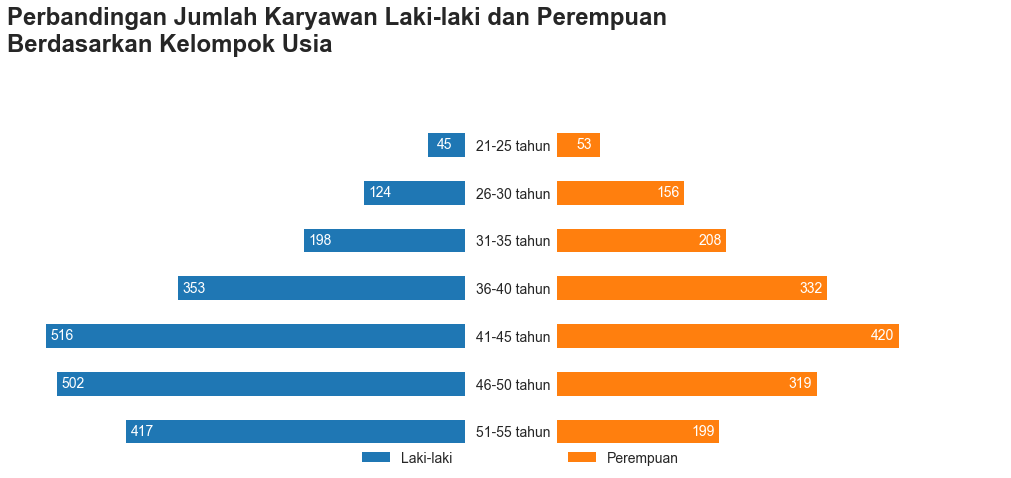

In [ ]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.style.use("seaborn")

tabel = (pd.read_csv("https://dqlab-dataset.s3-ap-southeast-1.amazonaws.com/usia_karyawan.csv").\
         sort_values("Kelompok Usia", ascending=False).set_index("Kelompok Usia"))
tabel["Laki-laki"] = -tabel["Laki-laki"]

fig, axes = plt.subplots(1, 2, figsize=(14, 6))
fig.suptitle("Perbandingan Jumlah Karyawan Laki-laki dan Perempuan\nBerdasarkan Kelompok Usia",
x=0., y=1.1, fontsize=24, fontweight='bold', ha="left")
tabel["Laki-laki"].plot(kind="barh", ax=axes[0], color="tab:blue", xlim=[-550, 0])
tabel["Perempuan"].plot(kind="barh", ax=axes[1], color="tab:orange", fontsize=14, xlim=[0, 550])

axes[0].set_ylabel("")
axes[0].set_xticklabels([""])
axes[0].set_yticklabels("")
axes[0].legend(["Laki-laki"], fontsize=14, bbox_to_anchor=(0., 0., 1., .05))
axes[0].set_frame_on(False)
axes[1].set_ylabel("")
axes[1].set_xticklabels([""])
axes[1].legend(["Perempuan"], fontsize=14, bbox_to_anchor=(0., 0., 0.3, .05))
axes[1].set_frame_on(False)

for i, m, w in zip(range(tabel.shape[0]), list(tabel['Laki-laki']), list(tabel['Perempuan'])):
    axes[0].annotate(str(abs(m)), (m+20, i), xytext=(m+20, i),
    color="w", va="center", ha="center", fontsize=14)
    axes[1].annotate(str(abs(w)), (w-20, i), xytext=(w-20, i),
    color="w", va="center", ha="center", fontsize=14)
    
plt.tight_layout()
plt.show()

## Solusi Visualisasi Data 1

Grafik kolom kurang cocok untuk menampilkan banyak kategori, dalam hal ini adalah rentang usia karyawan. Ada tujuh kelompok usia dalam tabel data, masing-masing memiliki keterangan sebanyak 11 karakter (huruf). Jika keterangan ini dijejer pada sumbu X, akan melebar dan makan tempat, bukan?

Pilihan yang lebih baik adalah menggunakan dua bar chart yang disusun menjadi piramida. Jenis grafik ini dapat menempatkan batang-batang grafik menjadi lebih berdekatan sehingga menghemat ruang tampilan. Dengan ukuran gambar yang sama seperti grafik sebelumnya, dimungkinkan juga untuk memilih ukuran huruf lebih besar dan lebih terbaca.

Sebagai catatan, ada trik khusus jika ingin membuatnya di Excel. Pada contoh ini, grafik tersebut sebetulnya terdiri dari dua grafik terpisah, masing-masing untuk laki-laki dan perempuan. Khusus untuk grafik laki-laki, hanya perlu mengubah nilai pada sumbu X menjadi terbaca dari kanan ke kiri (reverse order). Selain itu dapat juga mengubahnya pada jendela Format Data Series dalam Excel.

## Visualisasi Data 2

Pimpinan perusahaan merasa kesal karena setiap kali rapat, analis data mempresentasikan data report yang bertele-tele. Selain itu, ia selalu meragukan kesahihan kesimpulan dalam laporan itu karena analisis tidak dilakukan secara detail.

Ketika analis data itu memberikan data lebih detail, pimpinan perusahaan semakin kesal karena yang ditampilkan adalah data mentah yang masih sangat kotor dan harus ia simpulkan sendiri.

Pimpinan tersebut juga berkali-kali bertanya tentang data, yang disajikan dalam bentuk grafik tiga dimensi, atau grafik yang penuh dengan label data dengan garis dan blok warna-warni yang mencolok mata.

Kali ini aku mendapat tugas dari Senja untuk memperbaiki laporan dari contoh kasus tersebut. Tujuannya menyajikan visualisasi data yang enak dilihat, alur narasinya tepat, dan kesimpulannya benar.

Tugasnya mencari karyawan dengan tren produktivitas paling baik selama satu tahun lalu untuk mendapatkan reward sebagai best employee.

Masalahnya aku masih hanya bisa menggunakan Microsoft Excel dan PowerPoint untuk membuat presentasi laporan. Aku terbiasa menggunakan desain template dari kedua aplikasi itu. Yang aku tahu hanyalah jenis-jenis grafik bawaan yang disediakan pada aplikasi tersebut, contohnya seperti **Gambar 19**.

![](https://github.com/MyArist/DQLab/blob/master/Learn/Python/Fundamental/Fundamental%20Data%20Visualization%20with%20Python/Picts/19.png?raw=1)

**Gambar 19**: Grafik Jumlah Produksi Per Karyawan. 

### Tujuan

1. Memilih jenis grafik yang benar
2. Menyederhanakan tampilan grafik
3. Memilah dan menonjolkan informasi yang diperlukan
 

Berikut adalah data karyawan di perusahaan.

Bulan     | Karyawan A | Karyawan B | Karyawan C | Karyawan D | Karyawan E
:---:     | :---:      | :---:      | :---:      | :---:      | :---:
Januari   | 24345      | 30128      | 21039      | 26472      | 27894
Februari  | 25739      | 24678      | 20983      | 25382      | 28763
Maret     | 26489      | 25402      | 22321      | 28757      | 26748
April     | 23455      | 27320      | 23759      | 24443      | 26839
Mei       | 21093      | 22390      | 25873      | 32901      | 27110
Juni      | 25987      | 29871      | 21023      | 30211      | 26112
Juli      | 29223      | 28654      | 19420      | 31118      | 29878
Agustus   | 25667      | 27431      | 28999      | 28998      | 29320
September | 24091      | 24536      | 25831      | 28752      | 35733
Oktober   | 26201      | 23547      | 26758      | 24379      | 34289
November  | 25890      | 25439      | 25385      | 24390      | 33741
Desember  | 21345      | 29087      | 25380      | 24879      | 35478

Dengan menggunakan data karyawan di atas, aku dapat mengerjakan dengan menggunakan aplikasi Google spreadsheet, Excel, LibreOffice atau OpenOffice untuk memplotkan data ini, tentunya di laptop/komputer kamu nantinya. 

Akan tetapi kali ini aku akan melakukannya dengan menggunakan Matplotlib (salah satu library plotting di Python). Tapi, aku tidak merasa khawatir karena akan ada panduan untuk mengetikkan ulang kode yang telah diberikan.

## Visualisasi - Part 2: Matplotlib

Untuk membuat visualisasi dari data yang telah disediakan silakan mengetikkan kembali kode berikut di code editor:

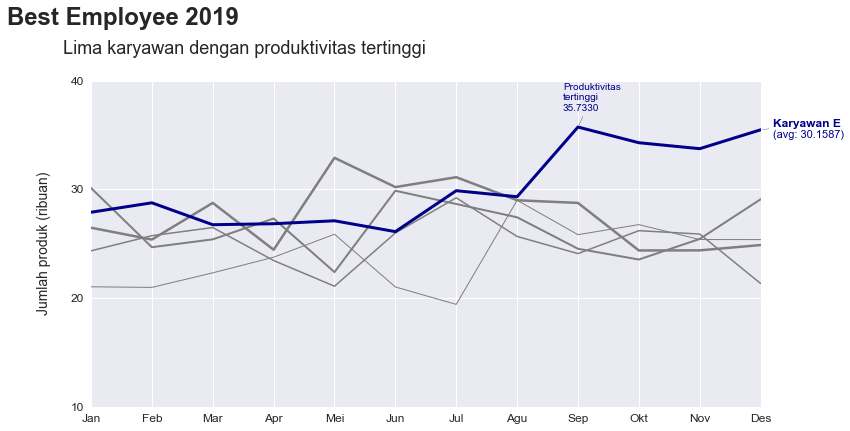

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

tabel = pd.read_csv("https://dqlab-dataset.s3-ap-southeast-1.amazonaws.com/produktivitas_karyawan.csv", 
                    index_col="Bulan") / 1000

fig, ax = plt.subplots(1, 1, figsize=(12, 6))
fig.suptitle("Best Employee 2019", x=0.028, y=1.05, fontsize=24, fontweight='bold', ha="left")
ax.set_title("Lima karyawan dengan produktivitas tertinggi\n", fontsize=18, ha="right")

colors = ["tab:gray", "tab:gray", "tab:gray", "tab:gray", "darkblue"]
line_widths = [ 1.5, 2, 1, 2.5, 3.]

lp = tabel.plot(kind="line", 
                ax=ax, 
                xlim=[0, 11], 
                ylim=[10, 40], 
                color=colors,
                xticks=range(tabel.shape[0]), 
                yticks=[10, 20, 30, 40])

add_lbl_pos = [ 0.3, 0.5, 1.2, -1.0, 0.5]
add_avg_pos = [-0.7, -0.5, 0.2, -2.0, -0.5]

for i, item in enumerate(lp.get_lines()):
    item.set_linewidth(line_widths[i])
    lbl = item.get_label()
    
ax.annotate(lbl, (11, tabel.loc["Desember", lbl]), 
            (11.2, tabel.loc["Desember", lbl] + add_lbl_pos[i]),
            fontweight="bold", 
            fontsize=12, 
            color=colors[i], 
            va="center",
            arrowprops={"arrowstyle": "-", "color": colors[i]})

ax.annotate("(avg: %.4f)" % tabel[lbl].mean(), 
            (11, tabel.loc["Desember", lbl]),
            (11.2, tabel.loc["Desember", lbl] + add_avg_pos[i]), 
            fontsize=11, 
            color=colors[i], 
            va="center")

highest_prod = tabel["Karyawan E"].max()
ax.annotate("Produktivitas\ntertinggi\n%.4f" % highest_prod, 
            (8, highest_prod), 
            (7.75, highest_prod+1.5),
            ha="left", 
            color=colors[-1], 
            arrowprops={"arrowstyle": "-", "color": colors[-1]})

ax.set_xticklabels([item[:3] for item in tabel.index], fontsize=12)
ax.set_yticklabels([str(i) for i in [10, 20, 30, 40]], fontsize=12)
ax.set_xlabel("")
ax.set_ylabel("Jumlah produk (ribuan)\n", fontsize=14)
ax.spines["top"].set_color("none")
ax.spines["right"].set_color("none")
ax.spines["bottom"].set_color("none")

ax.get_legend().remove()
plt.show()

## Solusi Visualisasi Data 2

Senja membantuku dengan memberi hint untuk mengganti jenis grafik batang menjadi grafik garis. Kenapa? Karena jenis inilah yang paling cocok untuk menggambarkan data produktivitas dari waktu ke waktu.

![](https://github.com/MyArist/DQLab/blob/master/Learn/Python/Fundamental/Fundamental%20Data%20Visualization%20with%20Python/Picts/porj.gif?raw=1)

Agar desainnya lebih simpel dan mudah dipahami, Senja juga menyarankan agar aku menyederhanakan tampilan grafik tersebut dengan langkah-langkah berikut ini (atau lihat Gambar 1 terkait proses perubahannya):

1. **Memilih jenis grafik garis (line chart)**. Jenis grafik ini cocok untuk menampilkan perubahan nilai variabel dari waktu ke waktu dengan elemen yang lebih sederhana dibanding grafik batang horizontal.
2. **Menghilangkan garis tepi grafik**. Menghilangkan garis tepi akan memberi kesan ruang grafik yang luas.
3. **Menghilangkan grid line/area**. Jika yang ditonjolkan adalah pola garis naik-turun grafik, grid line dapat disamarkan atau dihilangkan sama sekali. Jika tidak, area grafik akan penuh oleh garis saling silang.
4. **Menghapus label data dan marker**. Terlalu banyak label data justru akan membuat tampilan grafik menjadi penuh dan terkesan berantakan. Tentu saja boleh menghilangkan seluruhnya atau tampilkan label data pada titik-titik tertentu saja. Hanya saja jangan lupa hindari penggunaan warna pekat pada label data, kecuali bila nilai data itu menjadi sorotan utama.
5. **Menyederhanakan keterangan sumbu X dan Y**. Jika sumbu XY memuat angka ribuan atau lebih, ringkaslah angka itu dengan menyederhanakan nilai angka pada setiap sumbu. Jangan lupa memunculkan satuan angka pada sumbu tersebut.
6. **Mengatur legenda, judul, subjudul, keterangan**. Diperlukan permainan tipografi dan penempatan teks yang tepat. Judul haruslah berukuran paling besar dan warna pekat. Ukuran huruf dan warna untuk elemen lain diatur lebih kecil dan lebih tipis. Lekatkan legenda dengan elemen grafik (dalam hal ini garis-garis grafik) untuk memudahkan pembaca mencari keterangan atas grafik tersebut.
7. **Mengganti warna, tebal garis**. Tidak ada patokan khusus mengenai jumlah warna dan ukuran garis. Namun, pastikan bahwa elemen yang paling menonjol diberi warna lebih pekat dari elemen lain.
 
Desain ini dipilih karena tujuannya adalah mencari satu karyawan yang memiliki produktivitas tertinggi. Produktivitas itu dapat terlihat dari tren kenaikan jumlah produksi dari awal hingga akhir tahun. Bisa pula terlihat dari rata-rata jumlah produksi.

Setelah satu karyawan terbaik terpilih, grafik untuk karyawan lain dapat disamarkan dengan warna lebih tipis, demikian pula tebal garisnya. Bagaimana dengan zero baseline yang tidak dimulai dari angka nol? Di sinilah fleksibilitas grafik garis dibandingkan dengan grafik batang. Dengan grafik batang, garis dasar nol pada sumbu X wajib digunakan. Dalam contoh ini, nilai minimum sumbu Y dimulai dengan angka 10 (ribuan) dan garis sumbu X dihilangkan karena garis tersebut sering diasumsikan sebagai garis nol.

## Hasil Belajarku :)

Akhirnya, modul Introduction to Data Visualization telah ku selesaikan dengan baik. Berdasarkan materi-materi yang telah ku pelajari dan pahami serta praktekkan dalam modul ini, aku telah mendapatkan pengetahuan (knowledge) dan praktek (skill) yang diantaranya:

1. Mengenal visualisasi data
2. Urgensi visualisasi data
3. Visualisasi eksploratif versus naratif
4. Memetakan tujuan visualisasi data
5. Proses visualisasi data
6. Mengenal jenis grafik dan karakternya
7. Panduan singkat memilih grafik
8. Karakter visual suatu grafik
9. Bedah grafik

# You Have Passed the Module

![](https://github.com/MyArist/DQLab/blob/master/Learn/Python/Fundamental/Fundamental%20Data%20Visualization%20with%20Python/Picts/congratulations.png?raw=1)